<a href="https://colab.research.google.com/github/Aniket334/Digit-Recognition-App/blob/main/MNIST_Digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MNIST DIGIT CLASSIFICATION USING DEEPLEARNING(NEURAL NETWORK)**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# prompt: print the shape of x_train, y_train, x_test and y_test

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
#printing the 1st image
print(x_train[1])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
#setting up the neural network
model = keras.Sequential([
    keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#compiling the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#training the neural network
model.fit(x_train, y_train, epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 31ms/step - accuracy: 0.8086 - loss: 0.5779
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 30ms/step - accuracy: 0.9624 - loss: 0.1269
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9739 - loss: 0.0913
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9764 - loss: 0.0757
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9794 - loss: 0.0656
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9842 - loss: 0.0527
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9853 - loss: 0.0469
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9874 - loss: 0.0423
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9870 - loss: 0.0392
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9879 - loss: 0.0360
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9885 - loss: 0.0347
Epoch 12

In [ ]:
loss, accuracy=model.evaluate(x_test, y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9910 - loss: 0.0341
0.993399977684021


<function matplotlib.pyplot.show(close=None, block=None)>

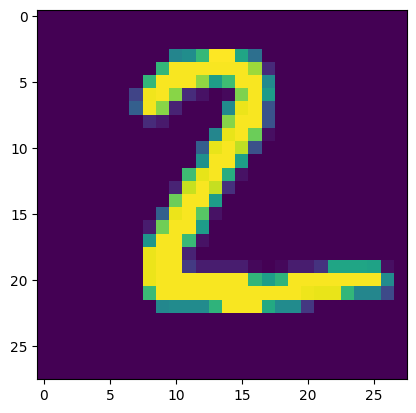

In [ ]:
plt.imshow(x_test[1])
plt.show

In [ ]:
print(y_test[1])

2


In [ ]:
y_pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [ ]:
print(y_pred.shape)

(10000, 10)


In [ ]:
print(y_pred[1])

[2.0011789e-16 1.0541526e-13 9.9999994e-01 1.3057143e-15 2.6641662e-18
 9.4511151e-28 2.5385505e-18 1.8904050e-15 5.2075185e-17 7.2809447e-21]


model.predict gives the probability of the number being of each class

In [ ]:
#converting the prediction probability to a class label
label_test_image=np.argmax(y_pred[1])
print(label_test_image)

2


In [ ]:
#converting the prediction probability for all data points
y_pred_labels=[np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 5, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 8, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

y_test -> True labels
y_pred_labels -> predicted labels

In [ ]:
#confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 977    1    0    0    0    0    1    0    0    1]
 [   0 1133    1    1    0    0    0    0    0    0]
 [   1    0 1024    0    0    0    0    6    1    0]
 [   0    0    0 1004    0    3    0    2    1    0]
 [   0    0    0    0  977    0    2    0    0    3]
 [   0    0    0    5    0  886    1    0    0    0]
 [   3    2    0    0    1    1  951    0    0    0]
 [   0    2    3    0    0    0    0 1020    1    2]
 [   1    0    2    1    0    0    0    1  967    2]
 [   0    0    0    2    4    4    0    1    3  995]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted labels')

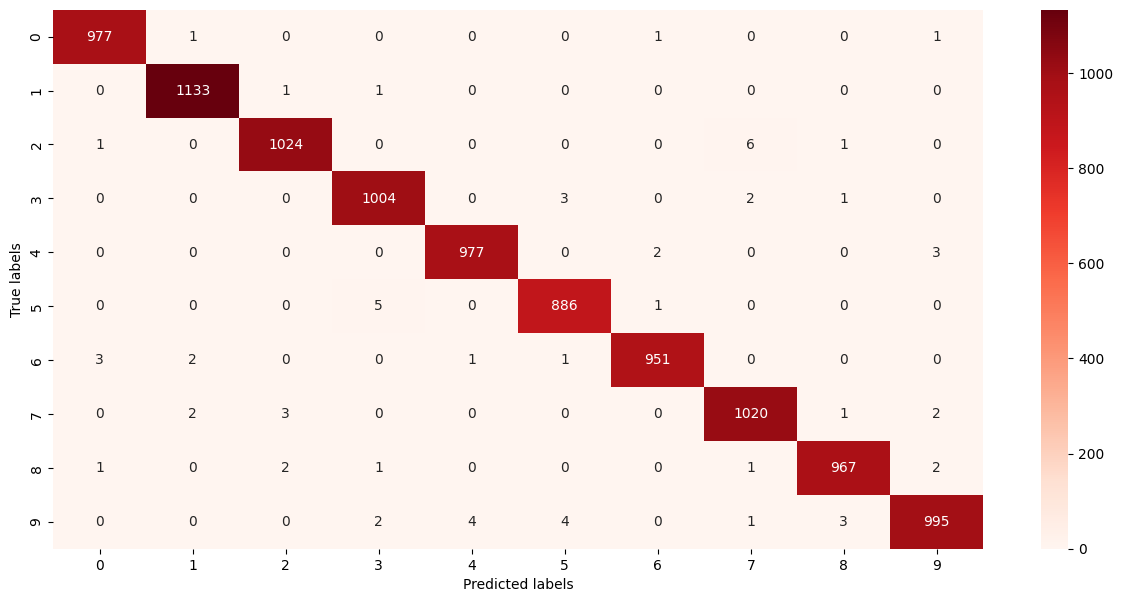

In [ ]:
plt.figure(figsize=(15,7))
sn.heatmap(conf_mat, annot=True, fmt='d', cmap='Reds')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')

In [ ]:
input_image_path='/content/Screenshot 2024-10-12 at 6.08.12 PM.png'
input_image=cv2.imread(input_image_path)

In [ ]:
type(input_image)
print(input_image.shape)

(540, 970, 3)


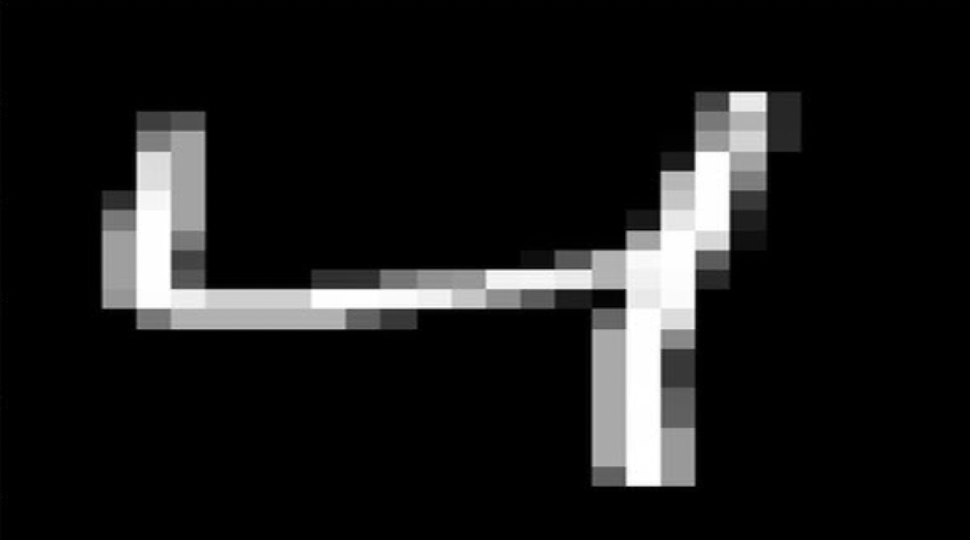

In [ ]:
cv2_imshow(input_image)

In [ ]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
grayscale.shape

(540, 970)

In [ ]:
input_image_resize=cv2.resize(grayscale, (28,28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize=input_image_resize/255

In [ ]:
image_reshaped=np.reshape(input_image_resize, [1,28,28])

In [ ]:
image_prediction=model.predict(image_reshaped)
print(image_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[1.5628083e-21 1.1023524e-15 3.0832952e-16 9.2599735e-21 1.0000000e+00
  2.9139412e-17 1.5353182e-15 4.1814708e-17 1.0506448e-15 4.7454157e-14]]


In [ ]:
image_predict_label= np.argmax(image_prediction)
print(image_predict_label)

4


In [ ]:
model.save('digit_recognition_model.keras')
from google.colab import files
files.download("digit_recognition_model.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
loaded_model = tf.keras.models.load_model('digit_recognition_model.keras')